**EDA Report**

**Problem Statement:**

Porter, India’s largest intra-city logistics marketplace, aims to accurately estimate delivery time for customer orders. Delivery time is influenced by factors such as order details, restaurant characteristics, and delivery partner availability. Through Exploratory Data Analysis (EDA), the goal is to understand these factors, handle data quality issues, engineer useful features, and prepare a clean dataset for building predictive models that improve customer satisfaction and optimize operations.


**Dataset Import & Overview**

In [43]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/dataset.csv.zip", parse_dates=["created_at","actual_delivery_time"])
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [44]:
df.shape

(197428, 14)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

**Missing Values**

In [46]:
df.isna().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [47]:
df.describe()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,197428,197421,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,2015-01-29 02:32:42,2015-01-29 03:22:29,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000
std,1.524867,NaN,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830


In [48]:
df =df.dropna(subset = 'actual_delivery_time')
df = df.dropna(subset=['market_id'])
df['store_primary_category'] = df['store_primary_category'].fillna('Unknown')
df['order_protocol'] = df['order_protocol'].fillna('Unknown')

for col in ['total_onshift_partners','total_busy_partners','total_outstanding_orders']:
  df[col]= df[col].fillna(df[col].median())



In [49]:
df.isna().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


**Target variable creation**

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


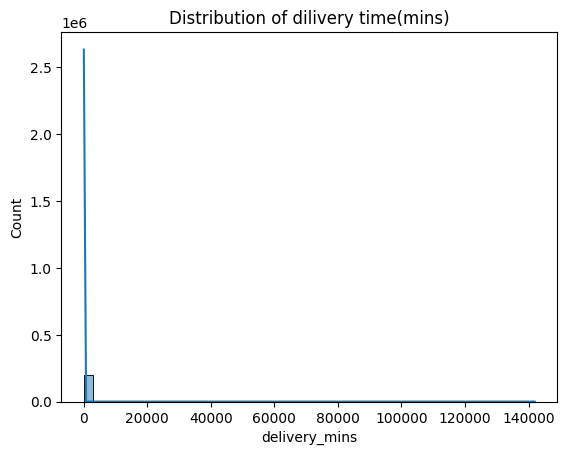

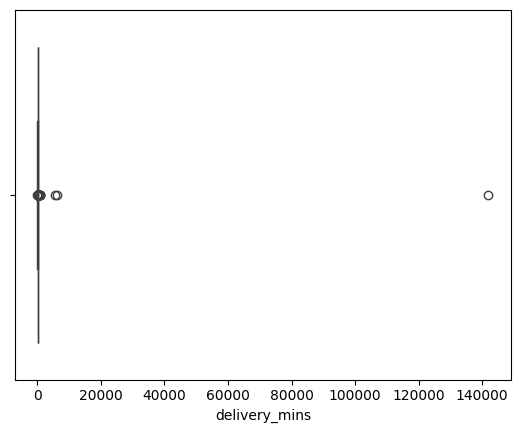

In [51]:
df['delivery_mins'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()/60

sns.histplot(df['delivery_mins'], bins = 50,kde= True)
plt.title('Distribution of dilivery time(mins)')
plt.show()

sns.boxplot(x=df['delivery_mins'])
plt.show()

**Removal of outliers**

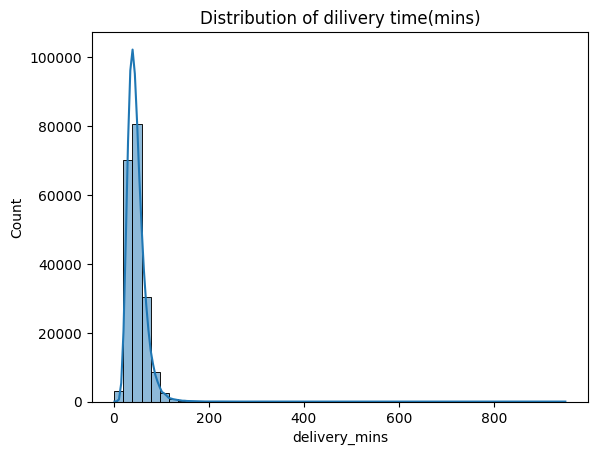

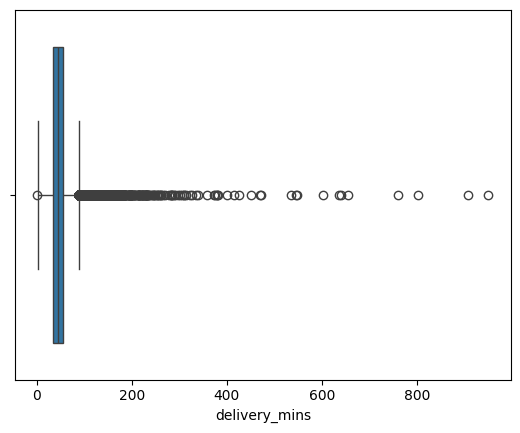

In [52]:

df = df[(df['delivery_mins']>0) & (df['delivery_mins']<4320)]

sns.histplot(df['delivery_mins'], bins = 50,kde= True)
plt.title('Distribution of dilivery time(mins)')
plt.show()

sns.boxplot(x=df['delivery_mins'])
plt.show()

**Univariate anaysis**

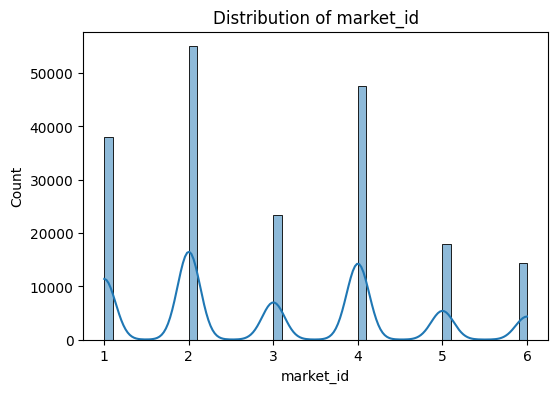

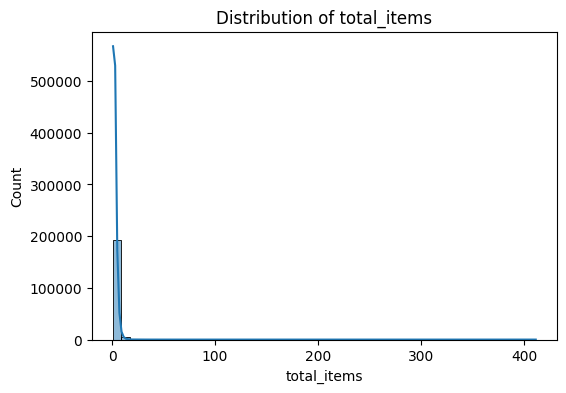

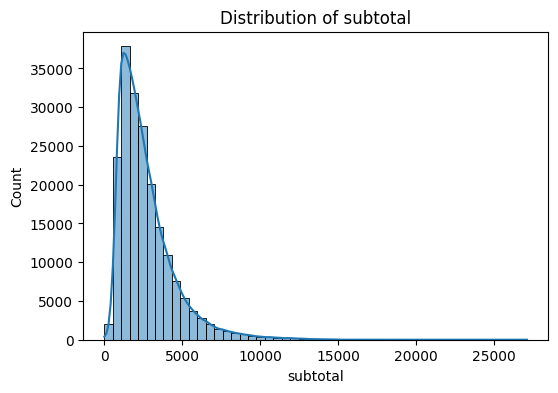

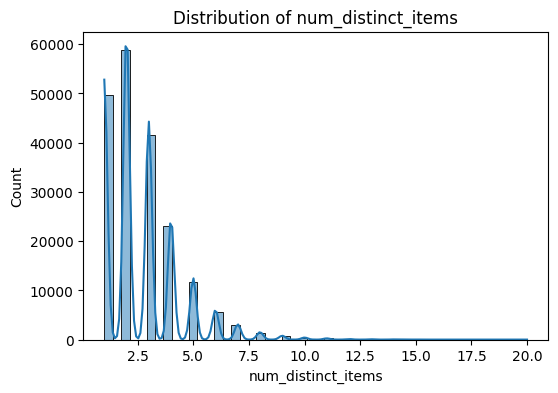

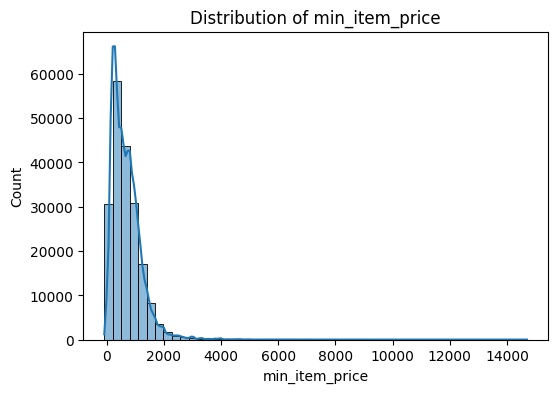

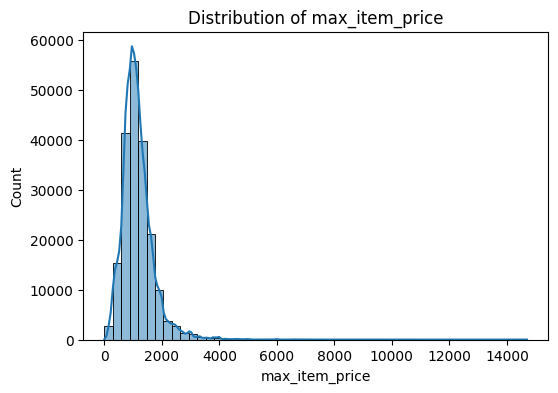

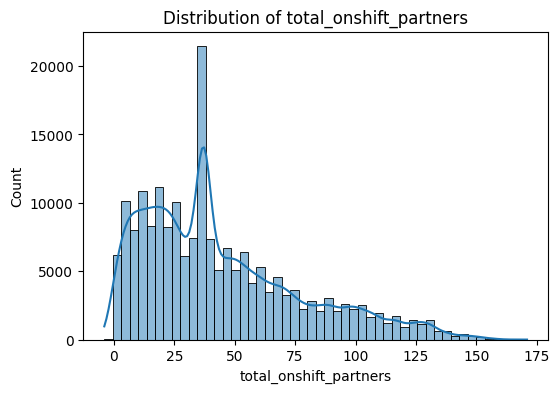

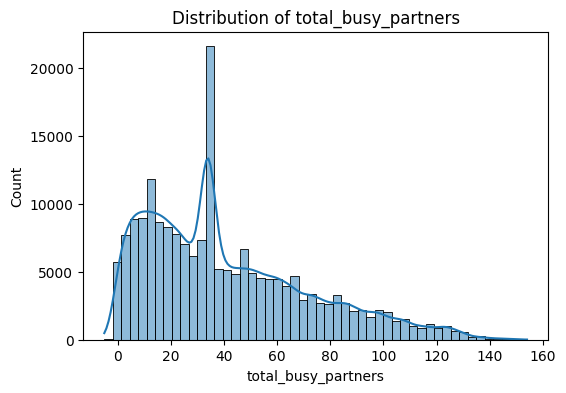

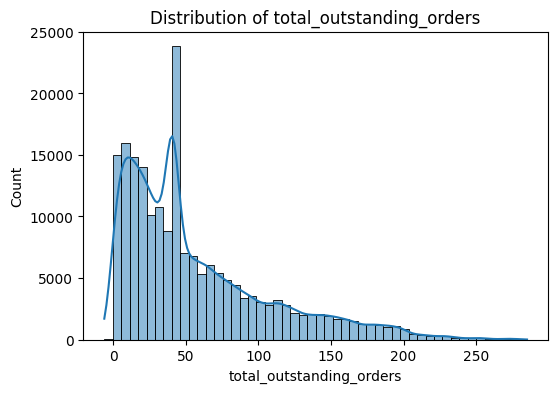

In [53]:
# numeric Features
num_cols = ['market_id','total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']
for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col], bins=50, kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

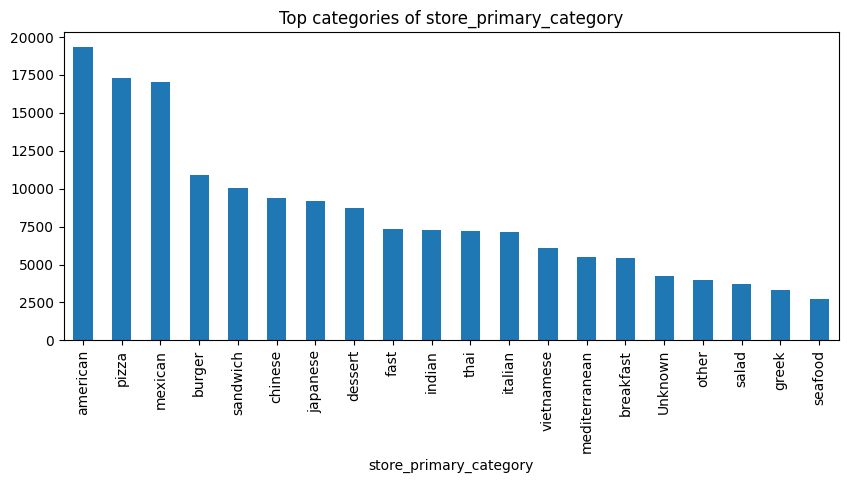

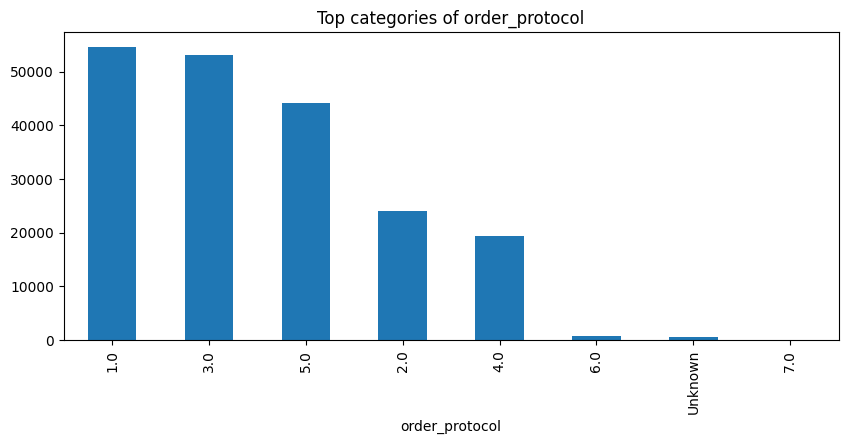

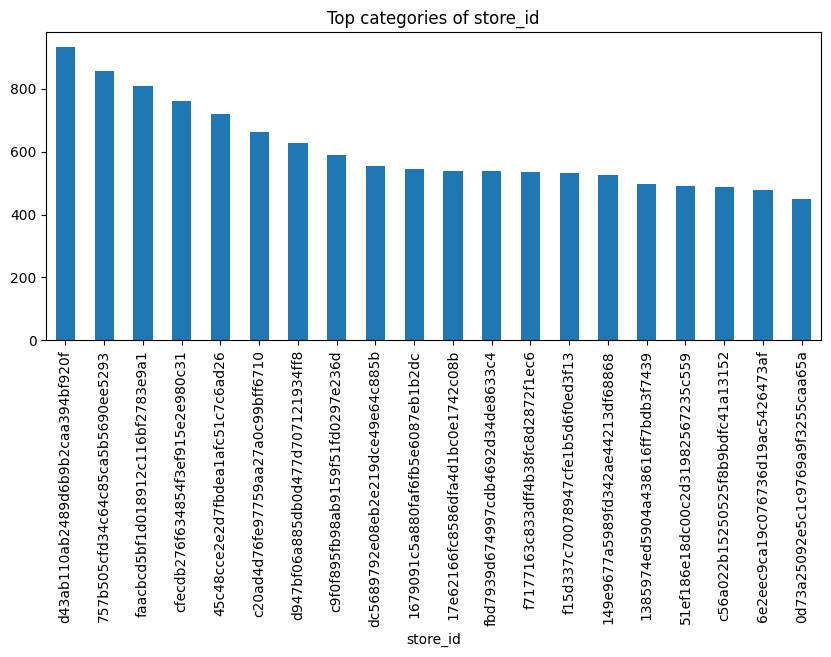

In [54]:
# categorical columns
cat_cols = ['store_primary_category','order_protocol','store_id']
for col in cat_cols:
  plt.figure(figsize=(10,4))
  df[col].value_counts().head(20).plot(kind='bar')
  plt.title(f'Top categories of {col}')
  plt.show()

**Correlation Analysis**

In [55]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
numeric_features.remove('delivery_mins')
pearson_corr = df[numeric_features].corrwith(df['delivery_mins']).sort_values(ascending=False)
spearman_corr = df[numeric_features].corrwith(df['delivery_mins'],method='spearman').sort_values(ascending=False)
print('Top pearson correlations:\n', pearson_corr.head())
print('\n Top Spearman correlations:\n',spearman_corr.head())

Top pearson correlations:
 subtotal                    0.204312
total_outstanding_orders    0.165715
num_distinct_items          0.147695
max_item_price              0.126225
total_items                 0.111073
dtype: float64

 Top Spearman correlations:
 subtotal                    0.235413
total_outstanding_orders    0.169173
num_distinct_items          0.160846
max_item_price              0.160077
total_items                 0.155416
dtype: float64


**Time based patterns**

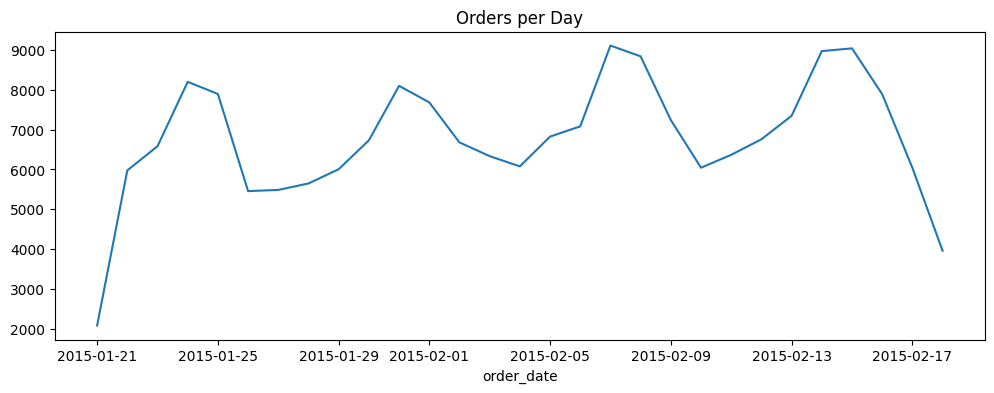

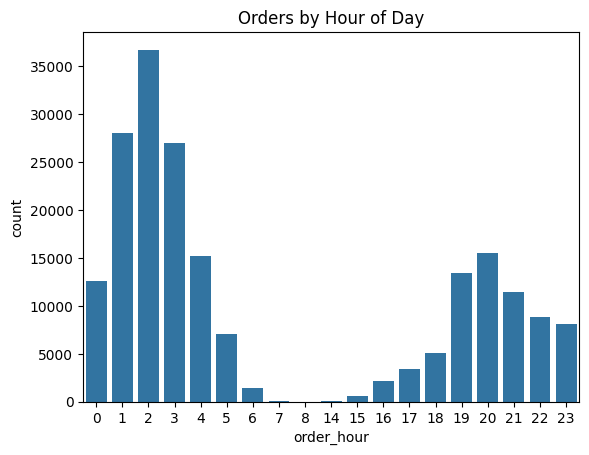

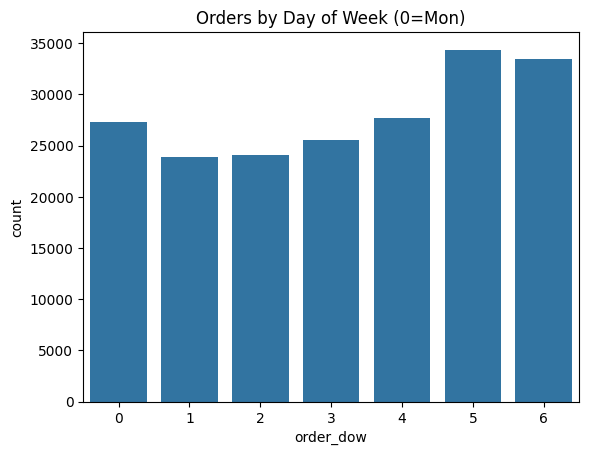

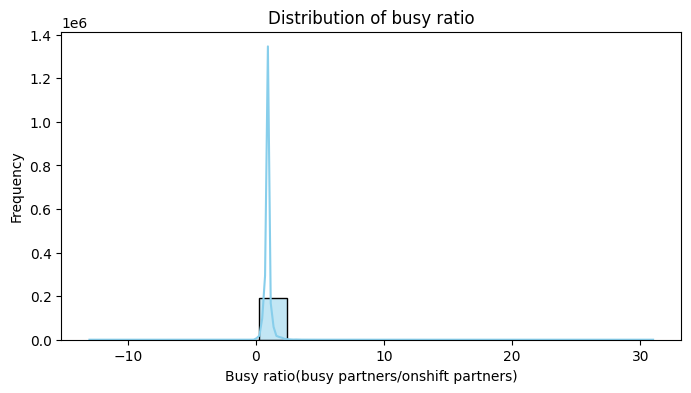

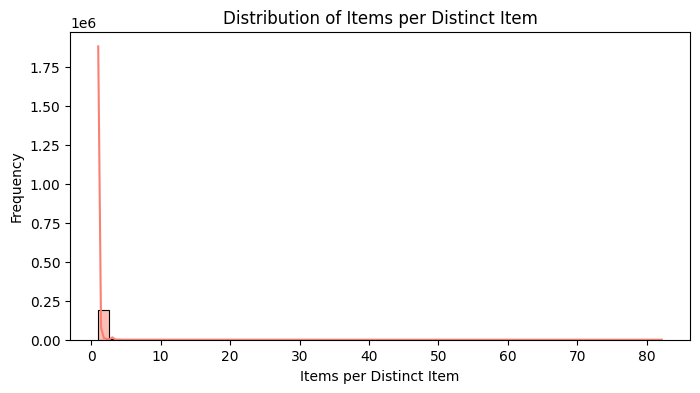

In [61]:
df['order_date'] = df['created_at'].dt.date
df['order_hour'] = df['created_at'].dt.hour
df['order_dow'] = df['created_at'].dt.dayofweek
df['is_weekend'] = df['order_dow'].isin([5,6]).astype(int)
df['busy_ratio'] = df['total_busy_partners']/df['total_onshift_partners']+1e-6
df['items_per_district'] = df['total_items']/df['num_distinct_items']+1e-6

orders_by_day = df.groupby('order_date').size()
orders_by_day.plot(figsize=(12,4))
plt.title('Orders per Day')
plt.show()

sns.countplot(x='order_hour', data=df)
plt.title('Orders by Hour of Day')
plt.show()

sns.countplot(x='order_dow', data=df)
plt.title('Orders by Day of Week (0=Mon)')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['busy_ratio'],bins=20,kde=True,color='skyblue')
plt.title('Distribution of busy ratio')
plt.xlabel('Busy ratio(busy partners/onshift partners)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['items_per_district'], bins=50, kde=True, color='salmon')
plt.title("Distribution of Items per Distinct Item")
plt.xlabel("Items per Distinct Item")
plt.ylabel("Frequency")
plt.show()